<a href="https://colab.research.google.com/github/VRB01/capstone/blob/main/Datasethandling_ourspeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

from datetime import datetime

import os
import numpy
from keras.models import Sequential
from keras.layers import LSTM
from keras.datasets import imdb
from keras.layers import Dense
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
Directory = 'gdrive/MyDrive/Voice Inputs'
Dataset = os.listdir(Directory)

In [ ]:
audio_list = []
speakers = []
for speaker in Dataset:
  audios = os.listdir(Directory+'/'+speaker)
  for audio in audios:
    if(audio.endswith('.wav')):
      audio_list.append(Directory+'/'+speaker+'/'+audio)
      speakers.append(audio.split('_')[0])




In [ ]:
audio_list = pd.DataFrame(audio_list)
audio_list = audio_list.rename(columns={0:'file'})
#len(audio_list)
len(speakers)

242

In [ ]:
audio_list['speaker'] = speakers
df = audio_list.sample(frac=1, random_state=42).reset_index(drop=True)
df = df[:12000]
df_train = df[:8000] #19984:
df_validation = df[8000:11000] #19984:25694
df_test = df[11000:12000] #25694:
labels = df['speaker']
Counter = 1
df

,file,speaker
0,gdrive/MyDrive/Voice Inputs/Kanishk/Kanishk_13...,Kanishk
1,gdrive/MyDrive/Voice Inputs/Kanishk/Kanishk_39...,Kanishk
2,gdrive/MyDrive/Voice Inputs/Kayan/Kayan_3822.wav,Kayan
3,gdrive/MyDrive/Voice Inputs/Rohit/Rohit_6461.wav,Rohit
4,gdrive/MyDrive/Voice Inputs/Rohit/Rohit_3700.wav,Rohit
...,...,...
237,gdrive/MyDrive/Voice Inputs/Aayush/Aayush_3959...,Aayush
238,gdrive/MyDrive/Voice Inputs/Kanishk/Kanishk_87...,Kanishk
239,gdrive/MyDrive/Voice Inputs/Aayush/Aayush_203.wav,Aayush
240,gdrive/MyDrive/Voice Inputs/Kayan/Kayan_5745.wav,Kayan


In [ ]:
def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(str(files.file))
    global Counter
    if(Counter%10==0):
      print(Counter)
    Counter+=1

    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    #stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    #chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    #contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    #tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    #sr=sample_rate).T,axis=0)
        
    
    # We add also the classes of each file as a label at the end
    #label = files.label

    return mel, mfccs

In [ ]:
startTime = datetime.now()
# Applying the function to the train data by accessing each row of the dataframe
features_label = df.apply(extract_features, axis=1)
print(datetime.now() - startTime)


10
20
30


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


40
50


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


60


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


70


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


80
90


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100
110


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


120


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


130
140
150


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


160
170
180


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


190
200


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


210
220


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


230
240
0:02:15.762138


In [ ]:
# Saving the numpy array because it takes a long time to extract the features
np.save('features_label', features_label)


In [ ]:
# loading the features
features_label = np.load('features_label.npy', allow_pickle=True)
features_label.shape

(242,)

In [ ]:
# We create an empty list where we will concatenate all the features into one long feature
# for each file to feed into our neural network 

features = []
for i in range(0, len(features_label)):
    features.append(np.concatenate((features_label[i][0], features_label[i][1]), axis=0))
# x_train = features_label[:1100]
# x_test = features_label[1100:]
# y_train = labels[:1100]
# y_test = labels[1100:]

In [ ]:
trial_features=[]
for i in range(0,len(features_label)):
  a=[]
  a.append(features_label[i][0])
  #a.append(features_label[i][1])
  trial_features.append(a)
xxx = np.array(trial_features)
xxx.shape


(242, 1, 128)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# x_train = list(x_train)
# x_train = np.asarray(x_train).astype('float32')

# #x_train = scaler.fit_transform(x_train)
# print(x_train.shape)
# x_train = x_train.reshape(1100,-1,128)
# x_test = list(x_test)
# x_test = np.asarray(x_test).astype('float32')

# #x_test = scaler.fit_transform(x_test)
# print(x_test.shape)
# x_test = x_test.reshape(100,-1,128)

In [ ]:
# y_train = np.asarray(y_train).astype('float32')
# #y_train = scaler.fit_transform([y_train])
# y_test = np.asarray(y_test).astype('float32')
# #y_test = scaler.fit_transform([y_test])

In [ ]:
# model = Sequential()
# model.add(LSTM(100, return_sequences=True, input_shape=(1200,128)))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model)

In [ ]:
# h = model.fit(x_train, y_train, epochs=60, batch_size=32, validation_data=(x_test,y_test))

In [ ]:
# import matplotlib.pyplot as plt
# xAxis = []
# for i in range(1,len(h.history['loss'])+1):
#   xAxis.append(i)
# #norm = [(0-float(i))/sum(h.history['loss']) for i in h.history['loss']]
# #norm1 = [(float(i)-min(h.history['loss']))/(max(h.history['loss'])-min(h.history['loss'])) for i in h.history['loss']]
# plt.plot(xAxis,h.history['loss'])
# plt.title('title name')
# plt.xlabel('xAxis name')
# plt.ylabel('yAxis name')
# plt.show()
# y_pred = model.predict(x_test)

# #y_pred = scaler.inverse_transform(pred)
# #y_test = scaler.inverse_transform([y_test])
# # from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [ ]:
# print(features_label)
# train_features = np.array(features_label[:800])
# val_features = [features_label[800:1100]]
# test_features = [features_label[1100:]]
# features = []
# features.append(np.concatenate(features_label, axis=0))
# print(features)
# #print(train_features)

In [ ]:
X = np.array(features)
y = np.array(labels)
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))
X.shape
y.shape

(242, 4)

In [ ]:

limit_1 = int(X.shape[0]*0.7)
limit_2 = int(X.shape[0]*0.85)


In [ ]:
X_train = X[:limit_1]
y_train = y[:limit_1]

X_val = X[limit_1:limit_2]
y_val = y[limit_1:limit_2]

X_test = X[limit_2:]
y_test = y[limit_2:]


In [ ]:
# features_label[800:1100]

In [ ]:
# X_val.shape

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [ ]:
# Build a simple dense model with early stopping with softmax for categorical classification
# We have 115 classes 

model = Sequential()

model.add(Dense(168, input_shape=(168,), activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))  

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))    

model.add(Dense(4, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
# fitting the model with the train data and validation with the validation data
# we used early stop with patience 100 because we did not want to use early stop
# I leave the early stop regularization code in case anyone wants to use it

history = model.fit(X_train, y_train, batch_size=64, epochs=100, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/100
3/3 [==============================] - 1s 129ms/step - loss: 1.5745 - accuracy: 0.1963 - val_loss: 1.0876 - val_accuracy: 0.6944
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 1.1548 - accuracy: 0.4850 - val_loss: 0.8214 - val_accuracy: 0.8889
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 0.9614 - accuracy: 0.7154 - val_loss: 0.6055 - val_accuracy: 0.9444
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.7552 - accuracy: 0.8450 - val_loss: 0.4113 - val_accuracy: 0.9722
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.4960 - accuracy: 0.9293 - val_loss: 0.2597 - val_accuracy: 0.9722
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 0.3475 - accuracy: 0.9529 - val_loss: 0.1614 - val_accuracy: 0.9722
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 0.2717 - accuracy: 0.9519 - val_loss: 0.1062 - val_accuracy: 0.9722
Epoch 8/100
3/3 [==

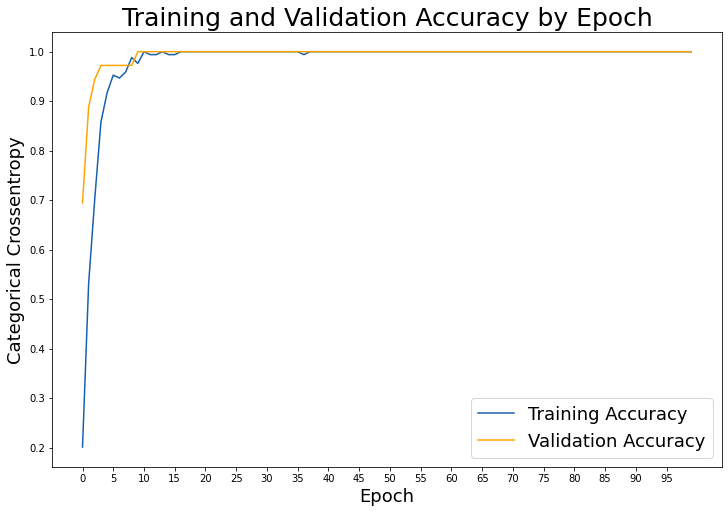

In [ ]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
import matplotlib.pyplot as plt
# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18);

In [ ]:
# We get our predictions from the test data
preds = model.predict_classes(X_test)
# We transform back our predictions to the speakers ids
preds = lb.inverse_transform(preds)
# We slice our dataframe to our test dataframe
df_test = df[limit_2:]
# We create a new column called preds and set it equal to our predictions
df_test['preds'] = preds
# Checking how our test dataframe looks like now with our predictions
df_test


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,file,speaker,preds
205,gdrive/MyDrive/Voice Inputs/Kanishk/Kanishk_40...,Kanishk,Kanishk
206,gdrive/MyDrive/Voice Inputs/Kanishk/Kanishk_55...,Kanishk,Kanishk
207,gdrive/MyDrive/Voice Inputs/Aayush/Aayush_738.wav,Aayush,Aayush
208,gdrive/MyDrive/Voice Inputs/Kanishk/Kanishk_71...,Kanishk,Kanishk
209,gdrive/MyDrive/Voice Inputs/Kanishk/Kanishk_34...,Kanishk,Kanishk
210,gdrive/MyDrive/Voice Inputs/Rohit/Rohit_2273.wav,Rohit,Rohit
211,gdrive/MyDrive/Voice Inputs/Kayan/Kayan_5120.wav,Kayan,Kayan
212,gdrive/MyDrive/Voice Inputs/Rohit/Rohit_4782.wav,Rohit,Rohit
213,gdrive/MyDrive/Voice Inputs/Kayan/Kayan_763.wav,Kayan,Kayan
214,gdrive/MyDrive/Voice Inputs/Kayan/Kayan_5998.wav,Kayan,Kayan


In [ ]:
# Checking how many speakers we got wrong
df_test[df_test['speaker'] != df_test['preds']]


,file,speaker,preds
227,gdrive/MyDrive/Voice Inputs/Aayush/Aayush_683.wav,Aayush,Kayan


In [ ]:
# Checking our model accuracy
1-round(len(df_test[df_test['speaker'] != df_test['preds']])/len(df_test),3)

0.973